### Section Import and view data

##### Steps
. Import data
. Separate label from input
. Visualize input
. gray scale image if required
. separate test-train split
. train model
. predict and evaluate

In [1]:
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc as smp
import tensorflow as tf

In [2]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [5]:
y_train = df.label
df.drop(['label'],axis=1, inplace=True)
x_train = df.values
x_test = df_test.values

In [6]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [7]:
from sklearn.preprocessing import OneHotEncoder

#One hot encode label column. So now our y vector contains number and yhot will contain one hot encoded values
onehot_encoder = OneHotEncoder(sparse = False)
yhot = onehot_encoder.fit_transform(y_train.values.reshape(-1,1))
print(yhot.shape)

(42000, 10)


In [8]:
print(yhot)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [9]:
y_train[3]

4

In [10]:
df.shape

(42000, 784)

#### Reshaping and Normalizing the Images

In [11]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (42000, 28, 28, 1)
Number of images in x_train 42000
Number of images in x_test 28000


#### Building the CNN

In [12]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


#### Compiling and Fitting the Model

In [13]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, batch_size = 100, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
42000/42000 [==============================] - 11s 273us/step - loss: 0.2964 - acc: 0.9118
Epoch 2/10
42000/42000 [==============================] - 11s 271us/step - loss: 0.1159 - acc: 0.9651
Epoch 3/10
42000/42000 [==============================] - 11s 269us/step - loss: 0.0746 - acc: 0.9771
Epoch 4/10
42000/42000 [==============================] - 11s 273us/step - loss: 0.0567 - acc: 0.9828
Epoch 5/10
42000/42000 [==============================] - 11s 274us/step - loss: 0.0455 - acc: 0.9862
Epoch 6/10
42000/42000 [==============================] - 12s 285us/step - loss: 0.0355 - acc: 0.9885
Epoch 7/10
42000/42000 [==============================] - 12s 275us/step - loss: 0.0292 - acc: 0.99071s - loss: 0.
Epoch 8/10
42000/42000 [==============================] - 12s 281us/step - loss: 0.0252 - acc: 0.9917
Epoch 9/10
42000/42000 [==============================] - 12s 278us/step - loss: 0.0208 - acc: 0.9933
Epoch 10/10
42000/420

#### Evaluate the model

In [14]:
model.evaluate(x_train, y_train)

42000/42000 [==============================] - 4s 100us/step


[0.005782772351307878, 0.9987380952380952]

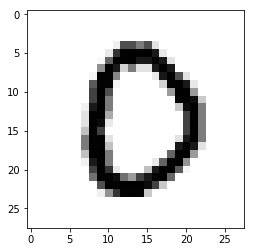

In [15]:
image_index = 19
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
#pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
#print(pred.argmax())

#### Make prediction

In [16]:
# Column in result file Id	Label
# read sample file
sub_lr = pd.read_csv('sample_submission.csv')

# Iterate over all sample records and predict the digit
for image_index in range(len(x_test)):
    pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
    
    # Each row will have the probabity of digit ranging from 0-9, take the max probability one. 
    sub_lr['Label'][image_index] = pred.argmax()

# write the result column in csv
sub_lr.to_csv('MNSIT_Pred.csv', index=False)

In [17]:
sub_lr = pd.read_csv('sample_submission.csv')
#sub_lr['Label'] = pred.argmax()